In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from itertools import combinations

plt.style.use("bmh")
df = pd.read_csv("review_data.csv")

In [2]:

job_rank_map = {
    #"no rank": 0,
    "Prejunior": 1,
    "Junior": 2,
    "Intermediate": 3,
    "Senior": 4,
    "Management": 5
}
job_ranks = job_rank_map.keys()

df['job_rank'] = df['job_rank'].map(job_rank_map, na_action='ignore')

df = df[df.job_rank.notna()]

management = df[df["job_rank"] == 5].rating
senior = df[df["job_rank"] == 4].rating
intermediate = df[df["job_rank"] == 3].rating
junior = df[df["job_rank"] == 2].rating
prejunior = df[df["job_rank"] == 1].rating
#no_rank = df[df['job_rank'] == 0].rating

rating_values = [prejunior, junior, intermediate, senior, management]
rating_values = pd.Series(rating_values, index=job_ranks)


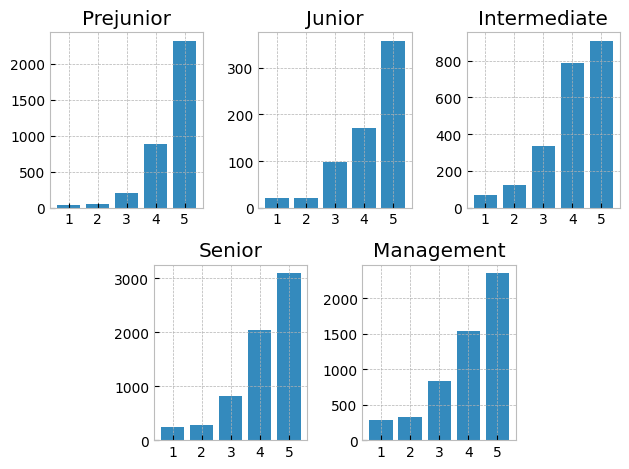

In [3]:
x = [5,4,3,2,1]

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax1.bar(x,rating_values[0].value_counts())
ax1.set_title(f"{rating_values.index[0].title()}")
ax1.set_facecolor("white")
ax1.set_xticks(ticks=x, labels=x)

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2.bar(x,rating_values[1].value_counts())
ax2.set_title(f"{rating_values.index[1].title()}")
ax2.set_xticks(ticks=x, labels=x)
ax2.set_facecolor("white")

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3.bar(x,rating_values[2].value_counts())
ax3.set_title(f"{rating_values.index[2].title()}")
ax3.set_xticks(ticks=x, labels=x)
ax3.set_facecolor("white")

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4.bar(x,rating_values[3].value_counts())
ax4.set_title(f"{rating_values.index[3].title()}")
ax4.set_facecolor("white")
ax4.set_xticks(ticks=x, labels=x)

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax5.bar(x,rating_values[4].value_counts())
ax5.set_title(f"{rating_values.index[4].title()}")
ax5.set_facecolor("white")
ax5.set_xticks(ticks=x, labels=x)

plt.tight_layout()

# Kruskal Wallis

$H_0$: All samples have the same centrel tendency (not that means are similar!) and therefore come from the same population

$H_1$: At least one of the independent samples does not have the same central tendency as the other samples and therefore originates from a different population.

<BarContainer object of 5 artists>

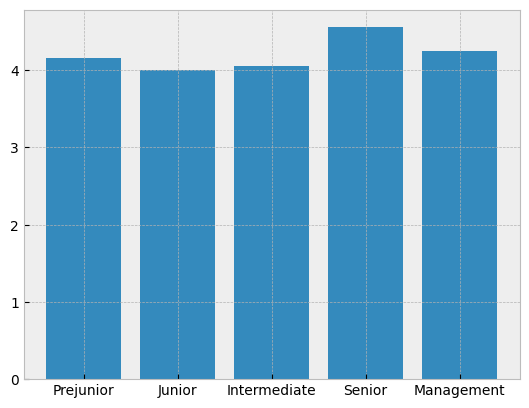

In [4]:
rating_means = [senior.mean(), management.mean(), intermediate.mean(), prejunior.mean(), junior.mean()]
plt.bar(job_ranks, rating_means)

In [5]:
kruskal_statistic, p = kruskal(management,
                               senior,
                               intermediate,
                               junior,
                               prejunior,
                               )

print(f"Kruskal statistic: {kruskal_statistic} | p: {p}")

Kruskal statistic: 669.4657261178025 | p: 1.4235034232858757e-143


# Wilcoxon-Mann-Whitney

In [6]:
sentiment_combinations = [("Negative", "Neutral"), ("Negative", "Positive"), ("Neutral", "Positive")]

for comb in sentiment_combinations:
    x = df.loc[df['sentiment'] == comb[0]].rating
    y = df.loc[df['sentiment'] == comb[1]].rating
    
    u_statistic, p = mannwhitneyu(x=x, 
                                  y=y, 
                                  alternative = "less")
    
    
    print(f"{comb}. P: {p}.\n Sample sizes are: {len(x)} and {len(y)}")

('Negative', 'Neutral'). P: 7.69997856803857e-129.
 Sample sizes are: 1942 and 2125
('Negative', 'Positive'). P: 0.0.
 Sample sizes are: 1942 and 14139
('Neutral', 'Positive'). P: 3.423098584232044e-306.
 Sample sizes are: 2125 and 14139


In [7]:
prejunior = df[df["job_rank"] == "Prejunior"].rating
junior = df[df["job_rank"] == "Junior"].rating
intermediate = df[df["job_rank"] == "Intermediate"].rating
senior = df[df["job_rank"] == "Senior"].rating
management = df[df["job_rank"] == "Management"].rating

In [8]:
# get all combinations of job ranks
job_rank_combinations = [(a, b) for idx, a in enumerate(list(rating_values.index)) for b in list(rating_values.index)[idx + 1:]]
job_rank_combinations[-3] = ("Senior", "Intermediate")
job_rank_combinations

[('Prejunior', 'Junior'),
 ('Prejunior', 'Intermediate'),
 ('Prejunior', 'Senior'),
 ('Prejunior', 'Management'),
 ('Junior', 'Intermediate'),
 ('Junior', 'Senior'),
 ('Junior', 'Management'),
 ('Senior', 'Intermediate'),
 ('Intermediate', 'Management'),
 ('Senior', 'Management')]

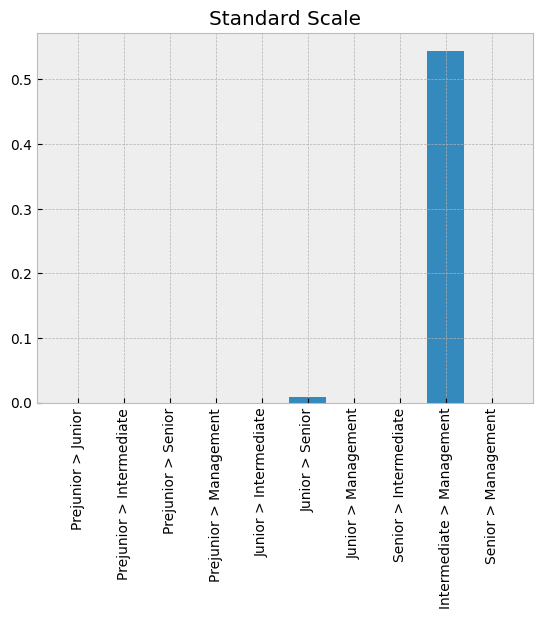

,U-statistic,p-value
Prejunior > Junior,1349427.0,3.880396e-15
Prejunior > Intermediate,5013330.5,1.319728e-96
Prejunior > Senior,13793556.0,2.050441e-88
Prejunior > Management,11850108.5,1.233493e-125
Junior > Intermediate,829120.0,3.072017e-07
Junior > Senior,2272638.0,8.627176e-03
Junior > Management,1974811.0,2.557408e-07
Senior > Intermediate,7712538.0,1.112153e-07
Intermediate > Management,5924923.5,5.447596e-01
Senior > Management,18390451.5,1.574285e-10


In [9]:
results = {}

for comb in job_rank_combinations:
    rank1 = comb[0] # first rank
    rank1_ratings = rating_values[rank1]
    
    rank2 = comb[1]
    rank2_ratings = rating_values[rank2] # second rank

    results[rank1.title() + " > " + rank2.title()] = mannwhitneyu(x=rank1_ratings, 
                                                   y=rank2_ratings,
                                                   alternative="greater")
    
r = pd.DataFrame(results).T
r.columns=["U-statistic", "p-value"]

plt.bar(r.index, r["p-value"])
plt.xticks(rotation=90)
plt.title("Standard Scale")
plt.show()
r

## Directional hypothesis testing

In [10]:
results = {}

for rating in rating_values:
    for other in rating_values:
        if list(rating) != list(other):
            results[f"{rating.name} vs. {other.name}"] = mannwhitneyu(x=rating, y=other, alternative="greater")
            
            print(mannwhitneyu(x=rating, y=other, alternative="greater"))
        else:
            continue

MannwhitneyuResult(statistic=1349427.0, pvalue=3.880396263811315e-15)
MannwhitneyuResult(statistic=5013330.5, pvalue=1.31972784985302e-96)
MannwhitneyuResult(statistic=13793556.0, pvalue=2.0504405259376952e-88)
MannwhitneyuResult(statistic=11850108.5, pvalue=1.2334932282032546e-125)
MannwhitneyuResult(statistic=976245.0, pvalue=0.9999999999999961)
MannwhitneyuResult(statistic=829120.0, pvalue=3.072017077759784e-07)
MannwhitneyuResult(statistic=2272638.0, pvalue=0.008627175939981893)
MannwhitneyuResult(statistic=1974811.0, pvalue=2.557407664335722e-07)
MannwhitneyuResult(statistic=2756369.5, pvalue=1.0)
MannwhitneyuResult(statistic=652730.0, pvalue=0.9999996928881425)
MannwhitneyuResult(statistic=6725487.0, pvalue=0.9999998887909114)
MannwhitneyuResult(statistic=5924923.5, pvalue=0.544759588679436)
MannwhitneyuResult(statistic=8866032.0, pvalue=1.0)
MannwhitneyuResult(statistic=2049036.0, pvalue=0.991373322904922)
MannwhitneyuResult(statistic=7712538.0, pvalue=1.1121534504632071e-07)
Ma